# Статистика, DS-поток
## Практическое задание 8. Множественная проверка гипотез

In [3]:
import numpy as np
import pandas as pd
import scipy.stats as sps
import seaborn as sns
import matplotlib.pyplot as plt

from statsmodels.sandbox.stats.multicomp import multipletests

_____
## Задача 1.

Вспомним задачу из предыдущего практического задания. Напомним формулировку.

Пусть $X_1, ..., X_n \sim Bern(p)$ &mdash; проведенные наблюдения, где $X_i = 1$, если в $i$-м испытании случилась неудача после того, как черный кот перебежал дорогу, а $p$ &mdash; неизвестная вероятность такого события. 
Вы хотите проверить гипотезу $\mathsf{H}_0\colon p=1/2$ против альтернативы $\mathsf{H}_1\colon p>1/2$. Нулевая гипотеза означает отсутствие связи между черным котом и неудачей, первая &mdash; что неудача происходит чаще если черный кот перебегает дорогу.

Укажите равномерно наиболее мощный критерий и определите для него p-value.

**Ответ:**
____
Известно, что $S = \left\{T(X) \geqslant c_\alpha\right\}$, где $T(X) = \sum_{i=1}^n X_i$, является равномерно наиболее мощным критерием для проверки этой гипотезы.

Критическое значение $c_\alpha = u_{1-\alpha} + 1$ (см. предыдущее домашнее задание).

Величина p-value определяется как $p(t) = \mathsf{P}_{0.5}(T(X) \geqslant t)$, где $t = \sum_{i=1}^n x_i$ &mdash; реализация статистики $T(X)$. Здесь важен нестрогий знак. В определении p-value говорится: *такое же* или еще более экстремальное.
____

Проведите несколько экспериментов аналогично предыдущему заданию, дополнив таблицу значениями p-value.

*Замечание:* Пользуйтесь функциями из `scipy.stats`. Внимательно проверьте правильность строгих и нестрогих знаков.

In [4]:
sns.set(font_scale=1.8, palette='Set2')
sns.set_style('darkgrid')

In [5]:
alpha = 0.05  # уровень значимости
table = []  # таблица для экспериментов

for size, t in zip([5, 10, 20, 30, 50], [4, 5, 15, 20, 20]):
    # критическое значение
    c_alpha = sps.binom(n=size, p=0.5).ppf(1 - alpha) + 1
    # pvalue, здесь -0.5 гарантирует, что берем нестрогий знак
    p_value = sps.binom(n=size, p=0.5).sf(t - 0.5)
    # добавляем результаты в таблицу
    table.append([size, t, c_alpha, p_value, p_value < alpha])
    
pd.DataFrame(table, columns=['size','T(x)','c_alpha','pvalue','rejected'])

,size,T(x),c_alpha,pvalue,rejected
0,5,4,5.0,0.187500,False
1,10,5,9.0,0.623047,False
2,20,15,15.0,0.020695,True
3,30,20,20.0,0.049369,True
4,50,20,32.0,0.940540,False


Представьте себя заказчиком. Каким должно быть истинное значение $p$, чтобы с точки зрения практики можно было бы считать, что связь между черным котом и неудачей имеется? 

**Ответ:** 
___
С точки зрения практики можем считать, например, что если $p \geqslant 0.6$, то связь есть. Вообще говоря, пороговое значение должно выбираться отдельно для каждой задачи.
___

Традиционный вопрос заказчика &mdash; сколько необходимо провести экспериментов? Заказчик не хочет долго ждать, но хочет, чтобы у вашего критерия была достаточная мощность.

Для начала сгенерируйте 10 выборок для двух случаев: 
1. $n=5, p=0.75$; 
2. $n=10^5, p=0.51$. 

В каждом случае в виде таблицы выведите реализацию статистики $T(X)$, соответствующее p-value и 0/1 &mdash; отвергается ли $\mathsf{H}_0$ (выводите 1, если отвергается).

**Первый случай.**

In [6]:
size = 5  # размер выборки
p = 0.75  # истинное значение p
table = []  # таблица для экспериментов

for _ in range(10):
    # генерация выборки и подсчет статистики
    t = sps.bernoulli(p=p).rvs(size=size).sum()
    #pvalue, здесь  -0.5 гарантирует, что берем нестрогий знак
    p_value = sps.binom(n=size, p=0.5).sf(t-0.5)
    table.append([t, p_value, p_value < alpha])
    
pd.DataFrame(table, columns=['T(x)','pvalue','rejected'])

,T(x),pvalue,rejected
0,5,0.03125,True
1,3,0.50000,False
2,3,0.50000,False
3,4,0.18750,False
4,5,0.03125,True
5,4,0.18750,False
6,4,0.18750,False
7,5,0.03125,True
8,3,0.50000,False
9,5,0.03125,True


**Второй случай.**

In [7]:
size = 10 ** 5
p = 0.51
table = []

for _ in range(10):
    t = sps.bernoulli(p=p).rvs(size=size).sum()
    # -0.5 гарантирует, что берем нестрогий знак
    p_value = sps.binom(n=size, p=0.5).sf(t-0.5)
    table.append([t, p_value, p_value < alpha])
    
pd.DataFrame(table, columns=['T(x)','pvalue','rejected'])

,T(x),pvalue,rejected
0,50900,6.386049e-09,True
1,51378,1.484668e-18,True
2,51005,1.054240e-10,True
3,51347,8.220861e-18,True
4,50855,3.250204e-08,True
5,50874,1.650857e-08,True
6,50856,3.137461e-08,True
7,50856,3.137461e-08,True
8,51052,1.460401e-11,True
9,51144,2.371992e-13,True


**Вывод:** Если выборка мала, то даже при сильном отклонении от основной гипотезы сложно что-либо отвергуть. При большой выборке даже при малом отклонении от основной гипотезы она отвергается практически всегда.

Теперь разберемся с тем, как подобрать оптимальный размер выборки.

1. Зафиксируйте значение $p^* > 1/2$, которое будет обладать следующим свойством.
    - Если истинное $p > p^*$, то такое отклонение от $1/2$ с практической точки зрения признается существенным, то есть действительно чаще случается неудача после того, как черный кот перебегает дорогу.
    - В противном случае отклонение с практической точки зрения признается несущественным.
2. Для некоторых $n$ постройте графики функции мощности критерия при $1/2 < p < 1$ и уровне значимости 0.05.
3. Выберите такое $n^*$, для которого функция мощности дает значение 0.8 при $p^*$.

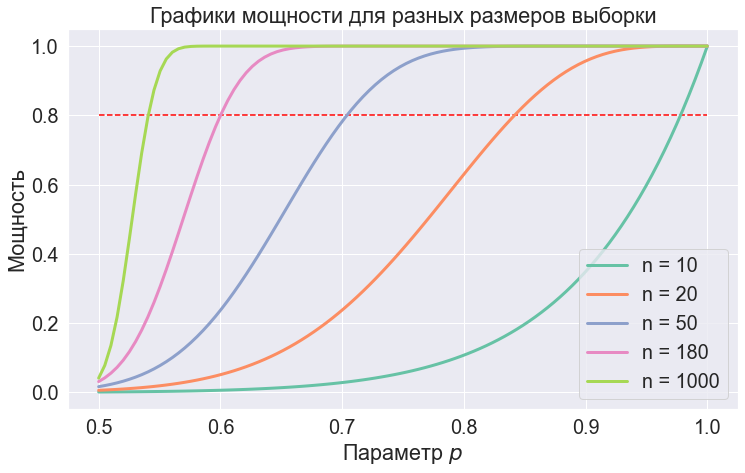

In [8]:
alpha = 0.05  # уровень значимости
# сетка для 1/2 < p < 1
alternative_p = np.linspace(0.5, 1, 100)

plt.figure(figsize=(12, 7))
# цикл по размерам выборок
for size in [10, 20, 50, 180, 1000]:
    # c_alpha
    c = sps.binom(n=size, p=0.5).ppf(1 - alpha) + 1
    # подсчет мощности и отрисовка
    power = sps.binom(n=size, p=alternative_p).sf(c)
    plt.plot(alternative_p, power, label='n = %d'%size, lw=3)
    

plt.hlines(0.8, 0.5, 1, 'r', '--')

plt.title('Графики мощности для разных размеров выборки')    
plt.xlabel('Параметр $p$')
plt.ylabel('Мощность')
plt.legend()
plt.show()

**Ответ:** В данном случае при $p^* = 0.6$ оптимальный размер выборки равен $n^* = 180$

Для выбранного $n^*$ проведите эксперимент, аналогичный проведенным ранее экспериментам, сгенерировав выборки для следующих истинных значений $p$: 
 1. $1/2 < p < p^*$; 
 2. $p > p^*$.

**Первый случай.** $1/2 < p < p^*$, рассмотрим $p=0.55$.

In [9]:
size = 180  # размер выборки
p = 0.55  # p > p*
table = []  # таблица для экспериментов

for _ in range(10):
    # генерация выборки и подсчет статистики
    t = sps.bernoulli(p=p).rvs(size=size).sum()
    #pvalue, здесь  -0.5 гарантирует, что берем нестрогий знак
    p_value = sps.binom(n=size, p=0.5).sf(t-0.5)
    table.append([t, p_value, p_value < alpha])
    
pd.DataFrame(table, columns=['T(x)','pvalue','rejected'])

,T(x),pvalue,rejected
0,99,0.102496,False
1,99,0.102496,False
2,109,0.002834,True
3,105,0.015185,True
4,93,0.354750,False
5,103,0.031053,True
6,86,0.748777,False
7,108,0.004450,True
8,101,0.058639,False
9,102,0.043094,True


**Второй случай.** $p > p^*$, рассмотрим $p=0.65$.

In [10]:
size = 180  # размер выборки
p = 0.65  # p > p*
table = []  # таблица для экспериментов

for _ in range(10):
    # генерация выборки и подсчет статистики
    t = sps.bernoulli(p=p).rvs(size=size).sum()
    #pvalue, здесь  -0.5 гарантирует, что берем нестрогий знак
    p_value = sps.binom(n=size, p=0.5).sf(t-0.5)
    table.append([t, p_value, p_value < alpha])
    
pd.DataFrame(table, columns=['T(x)','pvalue','rejected'])

,T(x),pvalue,rejected
0,125,9.594124e-08,True
1,124,2.183571e-07,True
2,121,2.217225e-06,True
3,117,3.475270e-05,True
4,113,3.753145e-04,True
5,115,1.195384e-04,True
6,124,2.183571e-07,True
7,119,9.205214e-06,True
8,118,1.809743e-05,True
9,121,2.217225e-06,True


**Вывод:** Многие критерии состоятельны (мощность сходится к 1), но это означает, что на практике основная гипотеза в большинстве случаев будет отвергаться, поскольку часто происходят несущественные отклоения от нее. На практике при наличии уже имеющейся выборке нужно оценивать практическую значимость результата. Если же стоит задача получения требуемого размера выборки, то ее можно решить с помощью кривых мощности, зависиксировав желаемую мощность и значимый результат.

_____
## Задача 2.

Рассмотрим выборку $X = (X_{1}, ..., X_{n}) \sim \mathcal{N}(\theta, 1)$. Проверяются гипотезы $\mathsf{H}_0\colon\ \theta = 0\ \ vs.\ \ \mathsf{H}_1\colon\ \theta\ > 0$.

Выпишите равномерно наиболее мощный критерий, который получен в предыдущем домашнем задании.

Из теоремы о монотонном отношении правдоподобия можно получить РНМК $S$:
$$
S = \left\{\sum_{i=1}^n x_i > c_\alpha \right\} \\
c_\alpha = \sqrt{n}z_{1-\alpha}
$$

На практике если предполагается, что распределение T(X) одинаково и непрерывно, то перед применением критерия можно проверить его на корректность следующим образом.
1. Генерируется множество искусственных выборок в предположении справедливости $\mathsf{H}_0$. 
2. По каждой из выборок вычисляется p-value.
3. По всем p-value строится гистограмма, которая визуально проверяется на равномерность.

Проверим корректность нашего критерия. Конечно, у нас случай довольно простой, тут и так "все понятно", но стоит отработать навык проверки.

Проведите эксперимент на $10^6$ выборок размера 100 и постройте гистограмму.

In [11]:
sns.set(font_scale=1.8, palette='Set2')
sns.set_style('whitegrid')

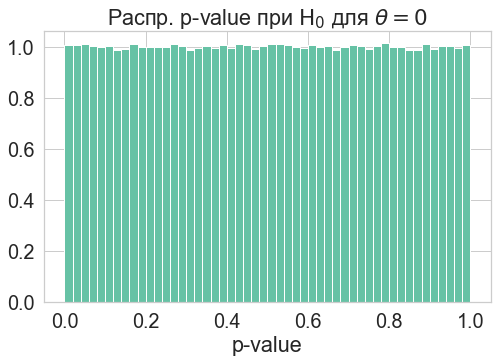

In [12]:
sample_size = 100  # размер выборки
sample_count = 10**6  # количество выборок

samples = sps.norm.rvs(size=(sample_count, sample_size))  # множество выборок
Z_stats = samples.sum(axis=1)  # статистика для каждой из выборок
pvalues = sps.norm(scale=np.sqrt(sample_size)).sf(Z_stats)  # p-value для каждой из выборок

plt.figure(figsize=(8, 5))
plt.title('Распр. p-value при $\\mathsf{H}_0$ для $\\theta = 0$')

plt.hist(pvalues, bins=50, density=True)
plt.xlabel('p-value')
plt.show()

Как известно, критерий не меняется при рассмотрении сложной основной гипотезы $\mathsf{H}_0\colon\ \theta \leqslant 0\ \ vs.\ \ \mathsf{H}_1\colon\ \theta\ > 0$.

Повторите эксперимент для истинного $\theta=-0.1$.

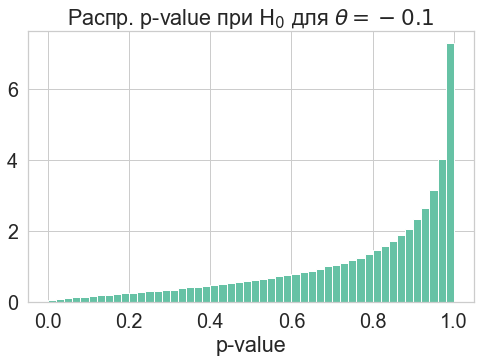

In [13]:
# генерация выборки
samples = sps.norm(loc=-0.1).rvs(size=(sample_count, sample_size))
# статистика для каждой из выборок
Z_stats = samples.sum(axis=1)
# p-value для каждой из выборок
pvalues = sps.norm(scale=np.sqrt(sample_size)).sf(Z_stats)

plt.figure(figsize=(8, 5))
plt.title('Распр. p-value при $\\mathsf{H}_0$ для $\\theta=-0.1$')

plt.hist(pvalues, bins=50, density=True)
plt.xlabel('p-value')
plt.show()

*Замечание.* Подобный эффект все равно не дает оснований говорить об уверенности $\mathsf{H}_0$, поскольку критерий может быть недостаточно мощным.

Проверьте, как ведет себя p-value для альтернативы, рассмотрев истинную $\theta=0.1$.

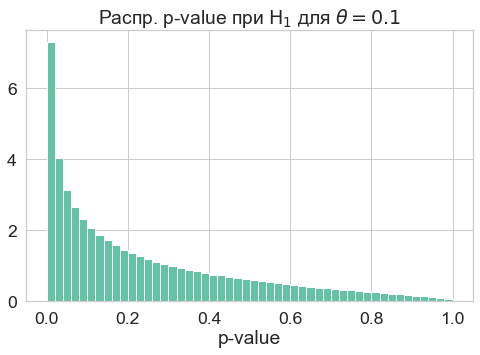

In [34]:
# генерация выборки
samples = sps.norm(loc=0.1).rvs(size=(sample_count, sample_size))
# статистика для каждой из выборок
Z_stats = samples.sum(axis=1)
# p-value для каждой из выборок
pvalues = sps.norm(scale=np.sqrt(sample_size)).sf(Z_stats)

plt.figure(figsize=(8, 5))
plt.title('Распр. p-value при $\\mathsf{H}_1$ для $\\theta=0.1$')

plt.hist(pvalues, bins=50, density=True)
plt.xlabel('p-value')
plt.show()

Чему соответствует доля случаев, в которых p-value меньше 0.05?

При pvalue меньше 0.05 мы отвергаем гипотезу $\mathsf{H}_0$, в нашем эксперименте справедлива альтернатива, поэтому эта доля есть то же самое, что и мощность.

**Вывод:** При использовании понятия pvalue нужно быть аккуратным. Если $\mathsf{H}_0$ не отвергается, то ничего сказать нельзя, p-value не есть степень уверенности в справедливости $\mathsf{H}_0$. Если p-value большое, то может быть такое, что $\mathsf{H}_0$ верно, а может и то, что у нас просто недостаточно мощный критерий.

_____
## Задача 3.

Проведите эксперимент предложенный в задаче 9 теоретического домашнего задания. Для этого промоделируйте работу компании в течение 100 дней в предположении справедливости $\mathsf{H}_0$. 

Повторив данный эксперимент достаточное количество раз, оцените ошибку I-ого рода.

Выпишем критерий:

$X_1, \dots, X_n \sim Bern(p)$, гипотеза $\mathsf{H}_0\colon p=1/2$ против альтернативы $\mathsf{H}_1\colon p>1/2$. Тогда РНМК критерий имеет вид $S = \left\{\sum_{i=1}^n x_i > c_\alpha\right\}$. $c_\alpha = u_{1-\alpha} + 1$, где $u_p$ &mdash; $p$-квантиль $Bin(n, 0.5)$

Чуть более формально можно записать так:
$$
c_\alpha =  \begin{cases}
    u_{1-\alpha}\: + 1, & \text{если } \mathsf{P}_{0.5}\:(T(X) = u_{1-\alpha}\:) > 0\\
    u_{1-\alpha}, & \text{иначе}
  \end{cases}
$$

Зафиксируем параметры эксперимента

In [15]:
sns.set(palette='Set2', font_scale=1.6)
sns.set_style('whitegrid')

In [16]:
day_count = 100  # размер выборки
sample_count = int(1e6)  # количество выборок для метода М-К.
theta = 1/2  # тета из основной гипотезы
alpha = 0.05  # уровень значимости критерия

In [17]:
# Набор выборок
X = sps.bernoulli(p=theta).rvs((sample_count, day_count))
# Cтатистика критерия
T = np.cumsum(X, axis=-1)
# Критическое значение на каждый день
c_alpha = sps.binom(n=np.arange(day_count) + 1, p=theta).ppf(1 - alpha) + 1

(T > c_alpha).any(axis=-1).mean()

0.102424

**Вывод:** данный эксперимент некорректен, т.к. при такой проверке ошибка первого рода больше 0.05.

В реальной практике не редко возникает соблазн посмотреть на результаты критерия раньше установленного срока окончания эксперимента. Если в такой момент вынести решение об отвержении гипотезы и прекращении эксперимента, то ошибка 1 рода будет выше заданной изначально.

---

Давайте еще посмотрим на распределение дней, в которые отвергалась гипотеза

In [18]:
# Выберем номер первого максимума из True (отвержение) и False (не отвержение)
results = np.argmax(
    np.concatenate(
        [
            T > c_alpha, 
            # Добавим "отвержение" после последнего дня экспериментов
            np.full(shape=(sample_count, 1), fill_value=True)
        ], 
        axis=-1
    ),
    axis=-1
) + 1

# Выкинем те случаи, в которых отвержение не наступило
results = results[results <= 100]

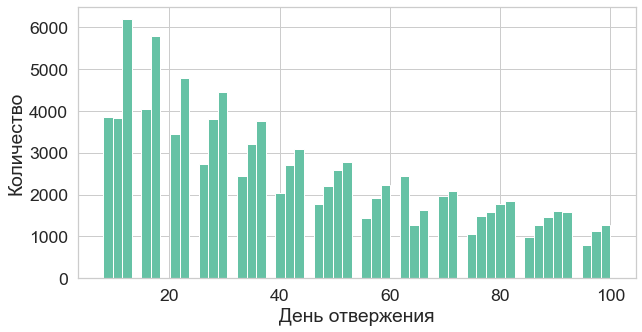

In [19]:
plt.figure(figsize=(10, 5))
plt.hist(results, bins='auto')
plt.xlabel('День отвержения')
plt.ylabel('Количество')
plt.show()

Визуализируем траектории первых 200 экспериментов

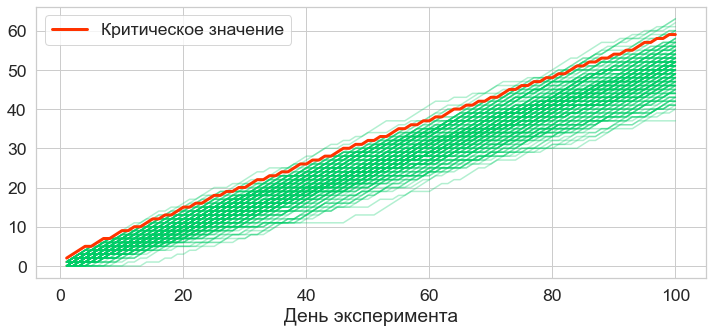

In [20]:
days = np.arange(day_count) + 1

plt.figure(figsize=(12, 5))
plt.plot(days, T[:200].T, c='#00CC66', alpha=0.3)
plt.plot(days, c_alpha, c='#FF3300', lw=3, label='Критическое значение')
plt.xlabel('День эксперимента')
plt.legend();

Выполним также преобразование для сведения к случайному блужданию и применения закона повторного логарифма.

/var/folders/zz/z0bz0b0s1nl9qcpl7yn045cc0000gn/T/ipykernel_49084/2254811823.py:3: RuntimeWarning: divide by zero encountered in log
  plt.plot(days, 2*np.sqrt(days)*np.log(np.log(days)), c='#0099CC', lw=3, label='Граница из ЗПЛ');


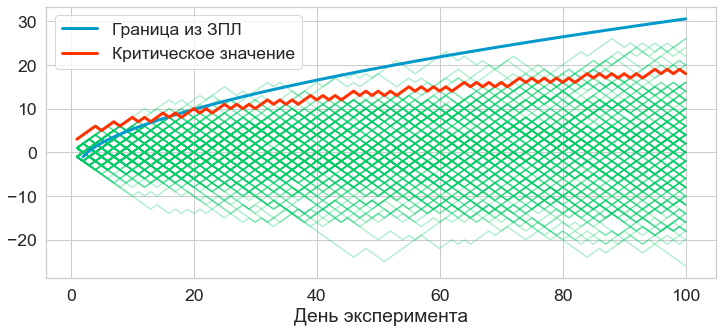

In [21]:
plt.figure(figsize=(12, 5))
plt.plot(days, 2*T[:200].T - days.reshape((100, 1)), c='#00CC66', alpha=0.3);
plt.plot(days, 2*np.sqrt(days)*np.log(np.log(days)), c='#0099CC', lw=3, label='Граница из ЗПЛ');
plt.plot(days, 2*c_alpha - days, c='#FF3300', lw=3, label='Критическое значение');
plt.xlabel('День эксперимента')
plt.legend();

Видим, что если продолжать эксперимент до тех пор, пока не получим стат. значимый результат, то рано или поздно с вероятностью 1 мы его получим.

_____
## Задача 4.
Были проведены эксперименты для оценки эффективности нескольких препаратов для снижения послеоперационной тошноты. Результаты экспериментов приведены в таблице ниже. При проведении эксперимента пациенты делились на группы случайным образом.




|| Количество пациентов   | Количество случаев возникновения тошноты |
|-----------| ----------- | -------|
|Плацебо|80|45|
|Хлорпромазин|75|26|
|Дименгидринат|85|52|
|Пентобарбитал (100 мг)|67|35|
|Пентобарбитал (150 мг)|85|37|




Проведите сравнение каждого препарата по эффективности по отношению к плацебо. Какие ответы можно получить для методов, контролирующих FWER и FDR? В каждом случае приведите подправленные p-value.

*Замечание.* Используйте [`multipletests`](https://www.statsmodels.org/dev/generated/statsmodels.stats.multitest.multipletests.html) из библиотеки `statsmodels`. 

**Решение:** 

Для каждой пары плацебо / препарат нас имеются две бернуллиевские выборки: $$X = (X_1, \ldots, X_n) \sim Bern(\theta_1) \\ Y = (Y_1, \ldots, Y_m) \sim Bern(\theta_2)$$
Первая из которых будет соответствовать какому-то препарату (индикатор того, что тошнота **отсутствует**), а вторая &mdash; плацебо.

Проверяется $\mathsf{H}_0 \colon \theta_1 = \theta_2 \ vs. \ \mathsf{H}_1 \colon \theta_1 > \theta_2$.

Будем использовать критерий Вальда:
$$
W(X, Y) = \frac{\overline{X} -\overline{Y}}{\widehat{\sigma}} \xrightarrow[]{d_0} \mathcal{N}(0, 1) \\
\widehat{\sigma} = \sqrt{\frac{\overline{X}(1 - \overline{X})}{n} + \frac{\overline{Y}(1 - \overline{Y})}{m}}
$$
Формула подсчета p-value: `p-value(t) = sps.norm.sf(t)`

Рассмотрим разные случаи.

Для удобства выделим подсчет статистики Вальда в функцию.

In [22]:
def wald_stats(x_mean, n, y_mean, m):
    '''
    Подсчет значения статистики Вальда.
    
    :param x_mean: среднее значение по выборке X
    :param n: размер выборки X
    :param y_mean: среднее значение по выборке Y
    :param m: размер выборки Y
    
    :return: посчитанное значение статистики Вальда
    '''
    sigma_hat = np.sqrt(x_mean*(1-x_mean)/n + y_mean*(1-y_mean)/m)
    return (x_mean - y_mean) / sigma_hat

Информация о плацебо.

In [23]:
placebo_m = 80  # размер выборки для плацебо
placebo_sum = 45  # количество случаев тошноты
# среднее по тем, у кого не было тошноты
placebo_mean = (placebo_m - placebo_sum) / placebo_m

**Хлорпромазин / плацебо**.

In [24]:
w_chlorp = wald_stats((75 - 26) / 75, 75, placebo_mean, placebo_m)
pval_chlorp = sps.norm.sf(w_chlorp)

print(f'W: {w_chlorp:.2f}, p-value: {pval_chlorp:.3f}')

W: 2.76, p-value: 0.003


**Дименгидринат / плацебо**.

In [25]:
w_dimen = wald_stats((85 - 52) / 85, 85, placebo_mean, placebo_m)
pval_dimen = sps.norm.sf(w_dimen)

print(f'W: {w_dimen:.2f}, p-value: {pval_dimen:.3f}')

W: -0.64, p-value: 0.740


**Пентобарбитал (100 мг) / плацебо.**

In [26]:
w_pent100 = wald_stats((67 - 35) / 67, 67, placebo_mean, placebo_m)
pval_pent100 = sps.norm.sf(w_pent100)

print(f'W: {w_pent100:.2f}, p-value: {pval_pent100:.3f}')

W: 0.49, p-value: 0.313


**Пентобарбитал (150 мг) / плацебо.**

In [27]:
w_pent150 = wald_stats((85 - 37) / 85, 85, placebo_mean, placebo_m)
pval_pent150 = sps.norm.sf(w_pent150)

print(f'W: {w_pent150:.2f}, p-value: {pval_pent150:.3f}')

W: 1.65, p-value: 0.050


Поскольку выборка $Y$ для каждого случая одна, то статистики зависимы, поэтому воспользуемся методом Холма и Бенджамини-Иекутиели.

In [28]:
# соберем все значения p-value вместе
pvals = [pval_chlorp, pval_dimen, pval_pent100, pval_pent150]
    
res, pvals_holm= multipletests(pvals, alpha=0.05, method='holm')[:2]
res

array([ True, False, False, False])

После МПГ коррекции по методу Холма эффективность не отвергается только для Хлорпромазина.

In [29]:
res, pvals_by = multipletests(pvals, alpha=0.05, method='fdr_by')[:2]
res

array([ True, False, False, False])

Для метода Бенджамини-Иекутиели ситуация аналогична.

Соберем значения pvalue в общую табличку.

In [30]:
pd.DataFrame([pvals, pvals_holm, pvals_by], 
             columns=['Хлорпромазин','Дименгидринат',
                      'Пентобарбитал (100 мг)','Пентобарбитал (150 мг)'],
             index=['pvalue до коррекции', 'метод Холма', 'метод Бенджамини-Иекутиели'])

,Хлорпромазин,Дименгидринат,Пентобарбитал (100 мг),Пентобарбитал (150 мг)
pvalue до коррекции,0.002852,0.739884,0.313332,0.049820
метод Холма,0.011407,0.739884,0.626664,0.149459
метод Бенджамини-Иекутиели,0.023764,1.000000,0.870367,0.207582


**Вывод:** При множественной проверке гипотез не стоит забывать про методы МПГ-коррекции, ведь в некоторых случаях они могут оказать влияние на результаты ваших исследований.

_____
## Задача 5.

В данной задаче вам нужно пронаблюдать эффект, который основные методы коррекции при множественной проверки гипотез оказывают на количественные характеристики критериев — FDR, FWER, мощность. В качестве примера рассматривается проверка односторонних гипотез для компонент вектора средних $\theta$ трёхмерного нормального распределения с известной матрицей ковариаций $\Sigma$. 

**Описание эксперимента**

Дана выборка $X = (X_1, \ldots, X_n)$ из трёхмерного нормального распределения с неизвестным вектором средних ${\theta}$ и известной матрицей ковариаций ${\Sigma}$ и вектор ${\theta_0}$. Для каждой из компонент вектора при помощи равномерно наиболее мощного критерия проверяется пара гипотез: $\mathsf{H}_j\colon\ \theta_j = \theta_j^0\ \ vs.\ \ \mathsf{H}'_j\colon\ \theta_j > \theta_j^0$, где $j\in\{1,2,3\}, \theta = (\theta_1, \theta_2, \theta_3), \theta_0 = (\theta_1^0, \theta_2^0, \theta_3^0)$. Уровень значимости для каждой из гипотез примем равным $\alpha = 0.05$.

Для простоты, в рамках эксперимента из каждой альтернативы будем рассматривать только одно значение $ \theta_j^1 \gg \theta_j^0 $, где ${\theta^{1}}$ — известный вектор. Для вектора средних ${\theta}$ рассматриваются все возможные комбинации: $ \theta_j = \theta_j^0\ \ vs.\ \ \theta_j = \theta_j^1$. В предположениях каждой из них генерируется выборка из $\mathcal{N}({\theta}, {\Sigma})$ и проверяются гипотезы. Эксперимент повторяется достаточное число раз, после чего вычисляются FDR, FWER и мощность критериев (доля правильно отвергнутых гипотез). Формально, вычисляются оценки данных величин.
Вначале эксперименты проводятся без МПГ-коррекции на каждом шаге, затем — с ней. Результаты сравниваются.

Всё вышеописанное повторяется для следующих матриц ковариаций:
1. Диагональная 
    $
    {\Sigma} = \begin{pmatrix} 
                           \alpha & 0 & 0\\ 
                           0 & \beta & 0\\ 
                           0 & 0 & \gamma 
                       \end{pmatrix}
    $;
2. Вырожденная $
    {\Sigma} = \begin{pmatrix} 
                           \alpha & \alpha & \alpha\\ 
                           \alpha & \alpha & \alpha\\ 
                           \alpha & \alpha & \alpha 
                       \end{pmatrix}
    $;
3. Произвольная ${\Sigma}$, не подходящая под условия 1 и 2.

**Реализация**

Вам предоставлен интерфейс для работы с классом `ExperimentHandler` из файла `mht.py`, который должен лежать в той же папке, что и ваш ipynb-файл. Вся работа с `ExperimentHandler` уже встроена в шаблон, *не меняйте ни класс, ни шаблон*. 

От вас требуется реализовать РНМК, вычисление FWER, FDR и мощности, а также три метода МПГ-коррекции — метод Бонферрони, метод Холма и метод Бенджамини-Иекутиели в файле `utils.py`. Классы-заглушки выдаются, вам нужно только заполнить содержательные пропуски в их реализации. Необходимость в реализации методов МПГ-коррекции вызвана тем, что данные методы в statsmodels реализованы не оптимально, и их использование в данной задаче загрузит ваш компьютер на несколько часов. 

Для пущей вычислительной эффективности, каждый метод коррекции принимает на вход *матрицу* p-value размерностей `(число_экспериментов, число_гипотез)` и выдаёт тоже *матрицы*: 
* булевую матрицу `reject`, которая указывает, какие именно гипотезы отвергаются;
* числовую матрицу `adjusted`, содержащую скорректированные p-value.

В данном случае число гипотез равно размерности многомерного нормального распределения, т.е. трём. Коррекция строк производится *независимо*, т.е. метод коррекции нужно применить к каждой строке, а результаты собрать в матрицу. Для вашего удобства, в шаблоне расставлены `assert`-ы, которые проверяют базовую адекватность ваших результатов. В силу нетривиальности векторизации этих методов (кроме Бонферрони), **разрешено использовать цикл по экспериментам**. Цикл по гипотезам тоже можно сделать, поскольку в данной задаче их всего три.

Код РНМК, на вход которому тоже подаётся матрица, должен быть полностью векторизован.

In [31]:
import numpy as np
import scipy.stats as sps

from tqdm.auto import tqdm

*Если вы ошибётесь в формулах, все ваши последующие усилия будут напрасны, потому будьте внимательны.*

#### 1. Теоретические формулировки

**a**. Напишите определения FWER, FDR, а также мощности процедуры МПГ

Обозначим через $\large{V_{\mathsf{P}, S}(X)}$ &mdash; количество верных гипотез, которые были отвергнуты для $\mathsf{P}$ , тогда
$$
\large{FWER  = \mathsf{P}(V_{\mathsf{P}, S}(X) > 0)}
$$ 

FWER &mdash; групповая ошибка I-го рода, где $\mathsf{P}$ - совместное распределение.

$\Large{FDR = \mathsf{E}_\mathsf{P} \frac{V_{\mathsf{P}, S}\;(X)}{\max(R_S(X), 1)}}$, где $R_S(X)$ &mdash; количество отвергнутых гипотез, другими словами FDR &mdash; ожидаемая доля ложнных отклонений

Мощность &mdash; доля правильно отвергнутых гипотез. Обозначим через $\large{U_{\mathsf{P}, S}(X)}$ количество неверных(ложных) отвергнутых гипотез, а через $\large{T_{\mathsf{P}, S}(X)}$ &mdash; число неверных(ложных), но не отвергннутых гипотез. Тогда общее число неверных гипотез будет $\large{T_{\mathsf{P}, S}(X) + U_{\mathsf{P}, S}(X)}$, а мощность &mdash; это $\Large{\mathsf{E}_{\mathsf{P}}\frac{U_{\mathsf{P}, S}(X)}{T_{\mathsf{P}, S}(X) + U_{\mathsf{P}, S}(X)}}$

**b.** Методы МПГ-коррекции. 

Напишите явно, какие величины (FDR, FWER) эти методы контролируют, а также приведите формулы пересчёта p-value и опишите процедуру, по которой определяется, какие из гипотез отвергнуть, а какие нет.  

* *Метод Бонферрони*

Краткое описание:

Метод Бонферрони &mdash; метод МПГ-коррекции для контроля $FWER$.Так как $FDR \leq FWER$ всегда, то контролируется обе величины.

Берем $\alpha_j = \frac{\alpha}{m}$, где $m$ &mdash; количество гипотез.

Пересчет p-value: $\tilde{p_j} = \min\left(mp_j, 1\right)$

* *Метод Холма*

Краткое описание:

Это нисходящая процедура, берем $\alpha_j = \frac{\alpha}{m -j + 1}$,
контролирует $FWER$. Значения p-value сортируются по возрастанию, гипотезы перегруппируются так же. Ищется минимальный индекс $j^*$, такой, что 
$p_{(j)} > \alpha_{(j)}$, отвергаются гипотезы $\mathsf{H}_{(1)}, ..., \mathsf{H}_{(j^* - 1)}$

Пересчет p-value:
$\tilde{p_j} = \min\left(1, \max\left(\tilde{p}_{j-1}, (m-j+1)p_j\right)\right)$

* *Метод Бенджамини-Иекутиели*

Краткое описание:

Восходящая процедруа, с $\large{\alpha_j = \frac{j\alpha}{m \sum_{s=1}^{m} \frac{1}{s}}} $. Контролирует $FDR$.
Аналогично сортируются p-value, переставляются гипотезы.
Ищется максимальный индекс $j^*$, такой, что 
$p_{(j)} \leq \alpha_{(j)}$, отвергаются гипотезы $\mathsf{H}_{(1)}, ..., \mathsf{H}_{(j^*)}$.

Пересчет p-value:
$\tilde{p_j} =\min\left(1, \tilde{p}_{j+1}, p_j\frac{m \sum 1/s}{j}\;\right)$

**с.** Реализация РНМК 

Выпишите формулу РНМК для проверки гипотез $\mathsf{H}_0\colon\ \theta = \theta_0\ \ vs.\ \ \mathsf{H}_1\colon\ \theta > \theta_0$ для $\mathcal{N}(\theta, \sigma^2)$ с известной дисперсией (одномерный случай).

 Критерий имеет вид: $\left\{ \sum x_i > \sqrt{n}\sigma z_{1-\alpha} + n\theta_0\right\}$

#### 2. Реализация.
В файле `utils.py` вам нужно реализовать подсчет FWER, FDR и мощности, а также три метода МПГ-коррекции: метод Бонферрони, метод Холма и метод Бенджамини-Иекутиели.

**Файл `utils.py` необходимо прислать вместе с ноутбуком.**

In [32]:
from mht import ExperimentHandler, AdjustmentMethodABC, AdjustmentMethodTester

In [ ]:
%load_ext autoreload
%autoreload 2

from utils_solution import compute_fwer, compute_fdr, compute_power, criterion, \
                  BonferroniAdjustment, HolmAdjustment, BenjaminiYekutieliAdjustment

*Замечание*. Обратите внимание на первые строчки в ячейке выше. Расширение [`autoreload`](https://ipython.org/ipython-doc/3/config/extensions/autoreload.html) позволяет перезагружать модуль перед выполнением кода в ячейке, что позволяет вам вносить правки в `utils.py` без необходимости ручной перезагрузки модулей.

#### 3. Подготовка к экспериментам.

Установим значения величин ${\theta_0}, {\theta_1}, {\Sigma}$, а также уровня значимости, числа запусков эксперимента и размера выборки в каждом из них.  
Эти параметры остаются неизменными от итерации к итерации. Для отладки выставляйте `n_runs = 100` или меньше.

In [ ]:
theta_list = [
    np.array([1, 2, 3]),  # \theta_0
    np.array([3, 6, 7])  # \theta_1
]
sample_size = 4  # размер выборки на каждой итерации
n_runs = int(1e6)  # число экспериментов для каждой из 8 конфигураций
alpha = 0.05  # уровень значимости
random_seed = 42  # random_state (для воспроизводимости)
# методы коррекции p-значений (НЕ МЕНЯТЬ)
correction_methods = [
    BonferroniAdjustment(alpha=alpha),
    HolmAdjustment(alpha=alpha),
    BenjaminiYekutieliAdjustment(alpha=alpha)
]
method_names = ["bonferroni", "holm", "fdr_by"]
experiment_results = {}

Убедимся в корректности нашей реализации, сравнив с эталонным решением из библиотеки `statsmodels`, а также проверим базовыми тестами подсчет FWER, FDR, мощности.  

In [ ]:
tester = AdjustmentMethodTester(correction_methods, method_names, 
                                compute_fwer, compute_fdr, compute_power)

tester.run_tests()

#### 4. Эксперименты

**a.** Диагональная матрица ${\Sigma}$

In [ ]:
Sigma = np.diag([16, 25, 36])
experiment = ExperimentHandler(
    theta_list=theta_list, 
    Sigma=Sigma,
    cov_mx_description="1. Диагональная матрица ковариаций",
    alpha=alpha,
    n_runs=n_runs,
    sample_size=sample_size, 
    random_seed=random_seed,
    correction_methods=correction_methods,
    criterion=criterion,
    compute_fwer=compute_fwer,
    compute_fdr=compute_fdr,
    compute_power=compute_power
)
experiment_results["1"] = experiment.run()

**b.** Вырожденная матрица ${\Sigma}$

In [ ]:
Sigma = np.full((3, 3), 4)
experiment = ExperimentHandler(
    theta_list=theta_list, 
    Sigma=Sigma,
    cov_mx_description="2. Вырожденная матрица",
    alpha=alpha,
    n_runs=n_runs,
    sample_size=sample_size, 
    random_seed=random_seed,
    correction_methods=correction_methods,
    criterion=criterion,
    compute_fwer=compute_fwer,
    compute_fdr=compute_fdr,
    compute_power=compute_power
)
experiment_results["2"] = experiment.run()

**с.** Произвольная матрица ковариаций ${\Sigma}$

In [ ]:
sqrt_Sigma = sps.norm.rvs(size=(3, 3))
Sigma = sqrt_Sigma @ sqrt_Sigma.T

assert (np.all(Sigma == Sigma.T) 
        and np.all(np.linalg.eigvals(Sigma) >= 0)),\
    "Это не матрица ковариаций."

experiment = ExperimentHandler(
    theta_list=theta_list, 
    Sigma=Sigma,
    cov_mx_description="3. Произвольная матрица ковариаций",
    alpha=alpha,
    n_runs=n_runs,
    sample_size=sample_size, 
    random_seed=random_seed,
    correction_methods=correction_methods,
    criterion=criterion,
    compute_fwer=compute_fwer,
    compute_fdr=compute_fdr,
    compute_power=compute_power
)
experiment_results["3"] = experiment.run()

#### 5. Вывод.

Опишите, какие свойства методов МПГ-коррекции вы пронаблюдали. Обоснуйте, почему методы МПГ-коррекции обязательно нужно применять. Поясните, что будет, если этого не делать.

* Мы пронаблюдали контроль FWER и, как следствие, контроль FDR. 

* Можно заметить, что без МПГ-коррекции значение FWER > 0.05, ошибка накапливается(красные клетки в графике), поэтому МПГ-коррекции необходимо применять, иначе мы будем совершать большую ошибку. 

* Все методы коррекции оказываются достаточно эффективными. В экспериментах можно заметить, что иногда мощность оказывается небольшой, но это связано с выбором параметров $\theta_0, \theta_1$ и матриц ковариаций.